# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [ ]:
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1igiLEsIzaU8Sf5sMoGrTKDoIeVP8O9wk'


Downloading...
From (original): https://drive.google.com/uc?id=1igiLEsIzaU8Sf5sMoGrTKDoIeVP8O9wk
From (redirected): https://drive.google.com/uc?id=1igiLEsIzaU8Sf5sMoGrTKDoIeVP8O9wk&confirm=t&uuid=1a532300-5909-4ab7-b964-e6452ded258e
To: /content/SMAI_A2_2024.zip
100% 122M/122M [00:02<00:00, 54.4MB/s]
unzip:  cannot find or open UD_English-Atiszip, UD_English-Atiszip.zip or UD_English-Atiszip.ZIP.
mv: cannot stat 'UD_English-Atis/*': No such file or directory
rm: cannot remove 'UD_English-Atis': No such file or directory
rm: cannot remove 'UD_English-Atis.zip': No such file or directory


In [ ]:
!unzip 'SMAI_A2_2024.zip'



Archive:  SMAI_A2_2024.zip
   creating: SMAI_A2_2024/
  inflating: SMAI_A2_2024/train_test_index.pickle  
  inflating: SMAI_A2_2024/product_reviews.xlsx  
  inflating: SMAI_A2_2024/training_3digits.hdf5  
  inflating: SMAI_A2_2024/testing_3digits_part1.hdf5  
  inflating: SMAI_A2_2024/product_reviews.csv  
  inflating: SMAI_A2_2024/testing_3digits_part2.hdf5  
  inflating: SMAI_A2_2024/roberta_embeds.npy.gz  
mv: cannot stat 'UD_English-Atis/*': No such file or directory
rm: cannot remove 'UD_English-Atis': No such file or directory
rm: cannot remove 'UD_English-Atis.zip': No such file or directory


In [ ]:
!mv SMAI_A2_2024/* ./
!rm -r SMAI_A2_2024
!rm SMAI_A2_2024.zip

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [ ]:
import pandas as pd

data = pd.read_excel('product_reviews.xlsx')

print(data.head())

print(data.shape)


                                                text  stars
0  Total bill for this horrible service? Over $8G...      1
1  Went in for a lunch. Steak sandwich was delici...      5
2  This place has gone down hill.  Clearly they h...      1
3  Walked in around 4 on a Friday afternoon, we s...      1
4  Michael from Red Carpet VIP is amazing ! I rea...      4
(26661, 2)


In [ ]:
import pandas as pd
import numpy as np
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

dataset = pd.read_excel('product_reviews.xlsx')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)

dataset['cleaned_text'] = dataset['text'].apply(clean_text)

with open('train_test_index.pickle', 'rb') as handle:
    train_test_index = pickle.load(handle)
train_indices = train_test_index['train_index']
test_indices = train_test_index['test_index']

X_train, X_test = dataset.loc[train_indices, 'cleaned_text'], dataset.loc[test_indices, 'cleaned_text']
y_train, y_test = dataset.loc[train_indices, 'stars'], dataset.loc[test_indices, 'stars']

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier_bow = MultinomialNB()
classifier_bow.fit(X_train_bow, y_train)

classifier_tfidf = MultinomialNB()
classifier_tfidf.fit(X_train_tfidf, y_train)

y_pred_bow = classifier_bow.predict(X_test_bow)

y_pred_tfidf = classifier_tfidf.predict(X_test_tfidf)

print("Classification Report for BoW features:")
print(classification_report(y_test, y_pred_bow))

print("\nClassification Report for TF-IDF features:")
print(classification_report(y_test, y_pred_tfidf))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Classification Report for BoW features:
              precision    recall  f1-score   support

           1       0.73      0.75      0.74      1149
           2       0.46      0.09      0.15       587
           4       0.48      0.49      0.49      1981
           5       0.79      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799


Classification Report for TF-IDF features:
              precision    recall  f1-score   support

           1       0.92      0.11      0.20      1149
           2       0.00      0.00      0.00       587
           4       0.53      0.01      0.02      1981
           5       0.59      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.51      0.28      0.24      8799
weighted avg       0.58      0.59      0.46      8799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report

Bag of Words (BoW) Features Summary:
The BoW feature-based classification model achieved a 70% accuracy across 8,799 samples, performing best on class 5 with high precision and recall, indicating its effectiveness in identifying these instances. However, its performance was significantly lower for class 2, suggesting difficulty in accurately classifying these samples. The model showed balanced outcomes for classes 1 and 4. Overall, the model demonstrated a moderate level of effectiveness with certain variations across different classes.

TF-IDF Features Summary:
The TF-IDF feature-based model showed a lower overall accuracy of 59%, with a notable bias towards class 5, achieving high recall but performing poorly on classes 2 and 4, almost failing to classify them correctly. The model exhibited high precision but extremely low recall for class 1, indicating a tendency to miss a large number of relevant instances. This model's performance highlighted significant disparities across classes, particularly struggling with accurately identifying and classifying a broad range of samples except for those in class 5.

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [ ]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

print(embeds[:10])

(26661, 1024)
[[ 0.50699836  0.61128891 -0.2719104  ...  1.0390445  -0.80041009
   0.73497975]
 [-0.02217656 -0.1527285  -0.55813098 ...  0.18087101  0.16279726
  -0.41220728]
 [ 0.52932245  0.60723621 -0.25953016 ...  1.0670861  -0.75681108
   0.69999683]
 ...
 [-0.02604434 -0.15120442 -0.55684215 ...  0.17136772  0.15985347
  -0.39651281]
 [-0.00949734 -0.16149481 -0.55674177 ...  0.20880875  0.17902455
  -0.44931689]
 [-0.05548117 -0.134252   -0.55495209 ...  0.10839856  0.09713247
  -0.26441288]]


(26661, 1024)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

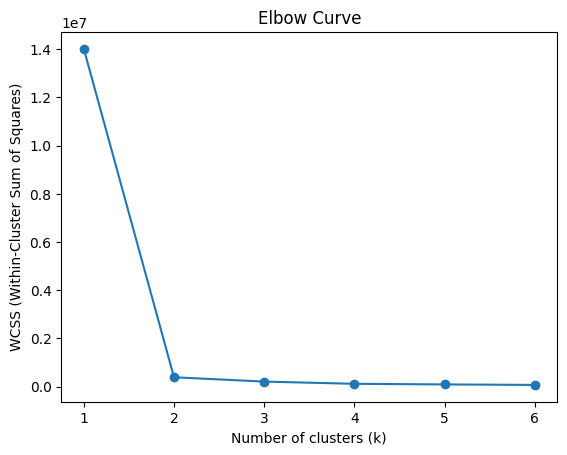

In [ ]:
import gzip
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

k_values = range(1, 7)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeds)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


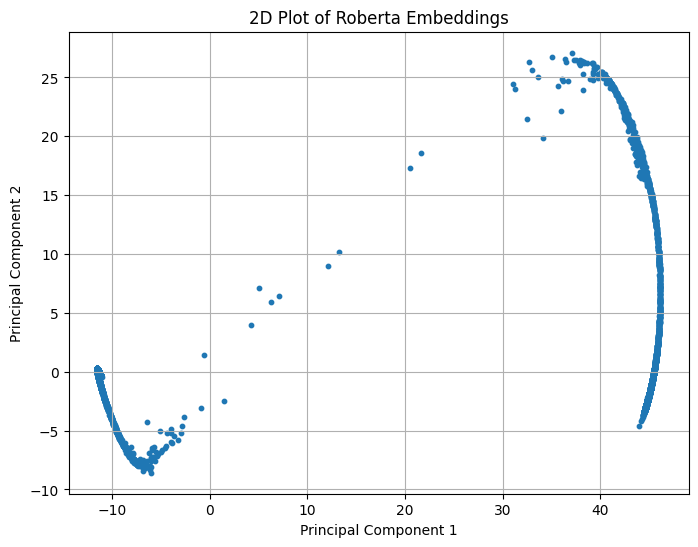

In [ ]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

with gzip.open('roberta_embeds.npy.gz', 'rb') as f:
    embeds = np.load(f)

pca = PCA(n_components=2)
embeds_2d = pca.fit_transform(embeds)

plt.figure(figsize=(8, 6))
plt.scatter(embeds_2d[:, 0], embeds_2d[:, 1], s=10)
plt.title('2D Plot of Roberta Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


(26661, 1024)


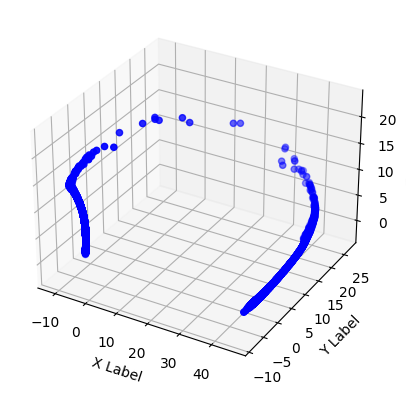

In [ ]:
import numpy as np
import gzip
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with gzip.open('roberta_embeds.npy.gz', 'r') as f:
    embeds = np.load(f)

print(embeds.shape)

pca = PCA(n_components=3)
embeds_3d = pca.fit_transform(embeds)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embeds_3d[:,0], embeds_3d[:,1], embeds_3d[:,2], c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


(26661, 1024)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

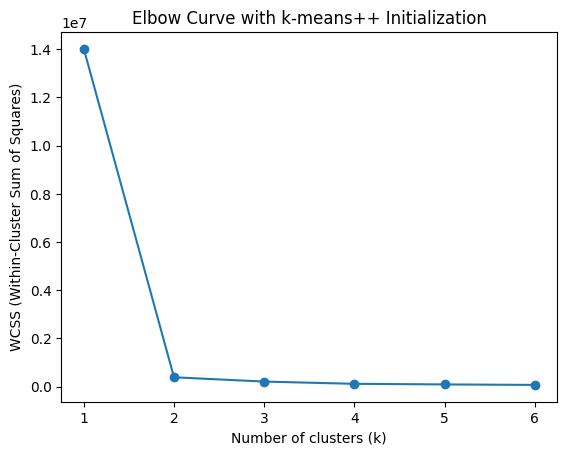

In [ ]:
import gzip
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

k_values = range(1, 7)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(embeds)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Curve with k-means++ Initialization')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


(26661, 1024)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

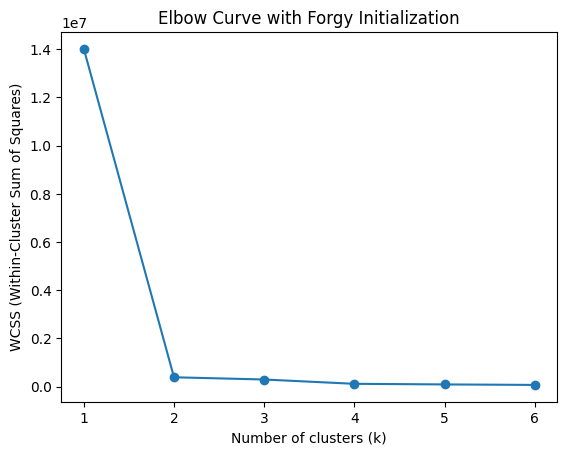

In [ ]:
import gzip
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

k_values = range(1, 7)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(embeds)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Curve with Forgy Initialization')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
import pandas as pd
import gzip
from sklearn.cluster import KMeans


def purity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

df_reviews = pd.read_csv('product_reviews.csv')
with gzip.open('roberta_embeds.npy.gz', 'rb') as f:
    embeds = np.load(f)

kmeans = KMeans(n_clusters=2, random_state=42).fit(embeds)
# kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(embeds)
# kmeans = KMeans(n_clusters=4, init='random', random_state=42).fit(embeds)

y_true = df_reviews['stars']
y_pred = kmeans.labels_




purity = purity_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
rand_index = adjusted_rand_score(y_true, y_pred)

print(f"Purity: {purity}")
print(f"NMI: {nmi}")
print(f"Rand Index: {rand_index}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Purity: 0.7039495892877237
NMI: 0.5342847123607223
Rand Index: 0.4628801127513728


In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
import pandas as pd
import gzip
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

def entropy(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    counts = np.array(list(Counter(labels).values()))
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    return -np.sum(probs * np.log(probs)) / np.log(n_classes)

def mutual_info(y_true, y_pred):
    contingency = np.histogram2d(y_true, y_pred, bins=(np.unique(y_true).size, np.unique(y_pred).size))[0]
    pi = np.sum(contingency, axis=1)
    pj = np.sum(contingency, axis=0)
    p_ij = contingency / contingency.sum()
    pi /= pi.sum()
    pj /= pj.sum()

    mi = np.nansum(p_ij * np.log(p_ij / np.outer(pi, pj)))
    return mi

def normalized_mutual_info_score(y_true, y_pred):
    mi = mutual_info(y_true, y_pred)
    h_true, h_pred = entropy(y_true), entropy(y_pred)

    return 2 * mi / (h_true + h_pred)


def adjusted_rand_score(y_true, y_pred):
    from scipy.special import comb
    from sklearn.metrics.cluster import contingency_matrix

    cont_matrix = contingency_matrix(y_true, y_pred)
    sum_comb_c = sum(comb(n_c, 2) for n_c in np.sum(cont_matrix, axis=1))
    sum_comb_k = sum(comb(n_k, 2) for n_k in np.sum(cont_matrix, axis=0))
    sum_comb = sum(comb(n_ij, 2) for n_ij in cont_matrix.flatten())
    total_comb = comb(np.sum(cont_matrix), 2)
    expected_comb = sum_comb_c * sum_comb_k / total_comb
    max_comb = (sum_comb_c + sum_comb_k) / 2
    if max_comb == expected_comb:
        return 0.0
    else:
        return (sum_comb - expected_comb) / (max_comb - expected_comb)


df_reviews = pd.read_csv('product_reviews.csv')
with gzip.open('roberta_embeds.npy.gz', 'rb') as f:
    embeds = np.load(f)

kmeans = KMeans(n_clusters=2, random_state=42).fit(embeds)
y_true = df_reviews['stars']
y_pred = kmeans.labels_

purity = purity_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
rand_index = adjusted_rand_score(y_true, y_pred)

# Print the evaluation metrics
print(f"Purity: {purity}")
print(f"NMI: {nmi}")
print(f"Rand Index: {rand_index}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Purity: 0.7039495892877237
NMI: 0.5571538206628003
Rand Index: 0.46288011275137286


<ipython-input-15-104d97f576bf>:35: RuntimeWarning: invalid value encountered in divide
  mi = np.nansum(p_ij * np.log(p_ij / np.outer(pi, pj)))



The K-means clustering metrics indicate a moderate performance with a purity of approximately 0.70, showing decent cluster homogeneity. The NMI score of about 0.56 suggests a moderate to good level of agreement between the clusters and the actual labels. However, the Rand Index at approximately 0.46 points to moderate accuracy in clustering decisions. Overall, these results suggest that while the clustering is reasonably effective, there is potential for improvement in aligning the clusters more closely with the true data distribution.